In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing/data/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Data Understanding

In [4]:
df.shape

(62988, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

* This dataset has 62988 rows dan 23 columns.
* There are several columns that have missing values.
* We probably don't need `MEMBER_NO` since it contains unique values
* Based on the values, the data type of `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, and `LAST_FLIGHT_DATE` should be `datetime`

### Statistical Summary

To make it easier, we should group the features based on their data type.

In [6]:
nums = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns
cats = df.select_dtypes(exclude=[np.number]).columns

In [7]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


* We find that the minimum age was 6, which does not make sense. We need to filter customers that are < 17 years old.

In [8]:
df[cats].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


* About 91% of them work in China. However, since this data has many categories, I think it is better to drop `WORK_CITY`, `WORK_PROVINCE` and `WORK_COUNTRY` altogether

### Univariate

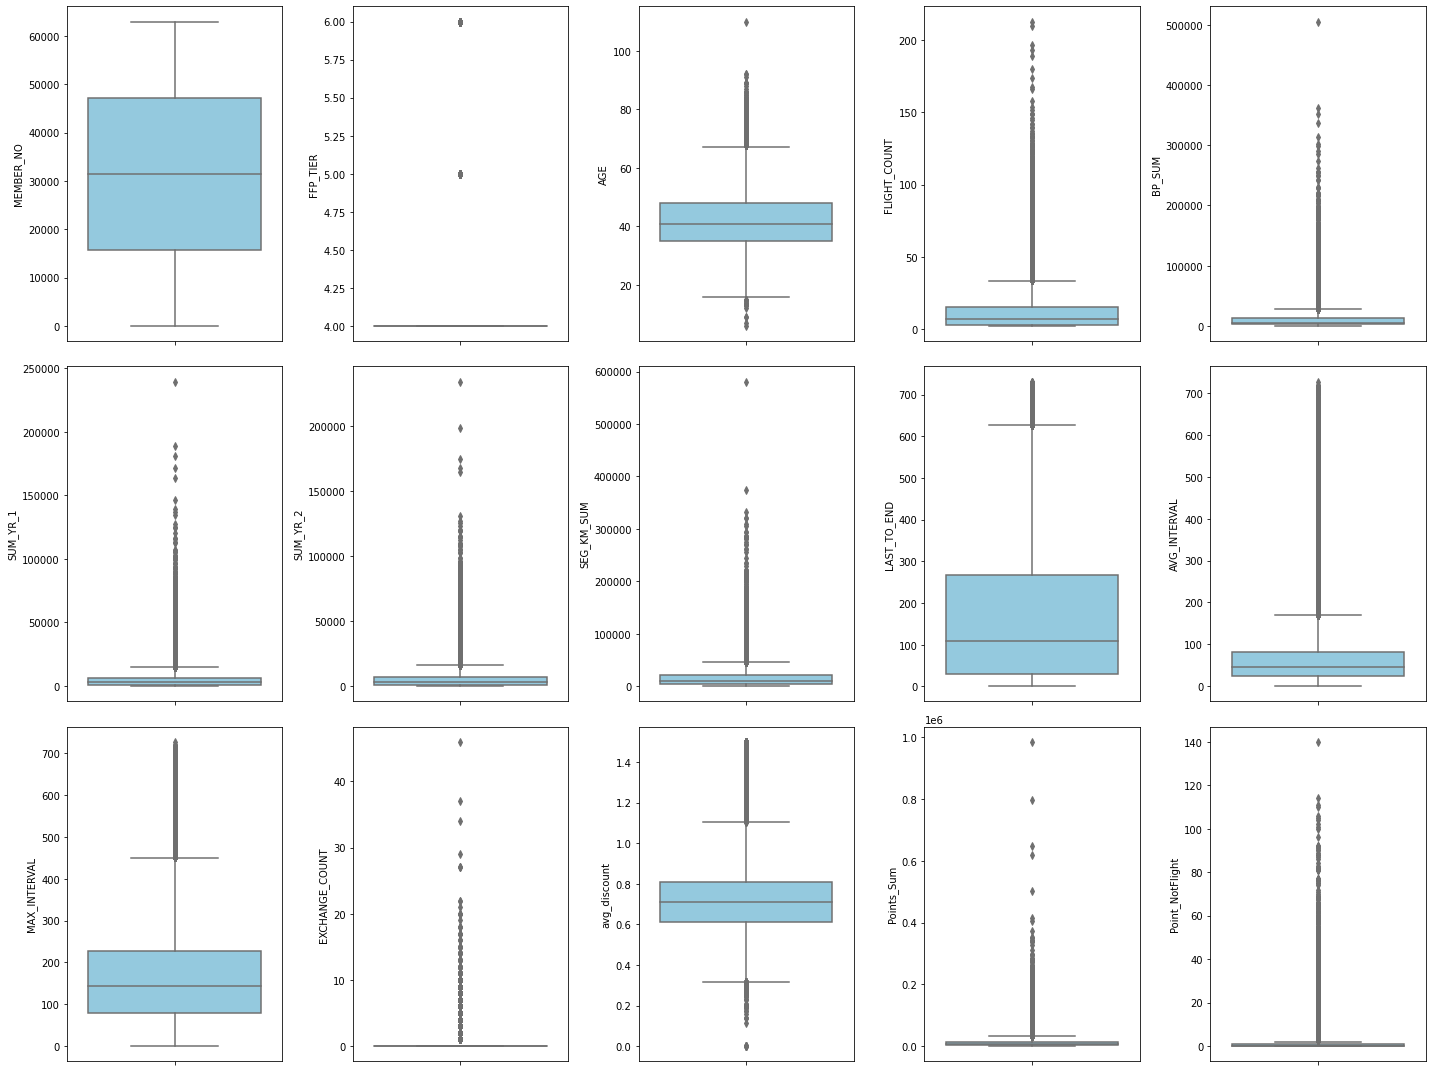

In [9]:
plt.figure(figsize=(20,15))
features = nums
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

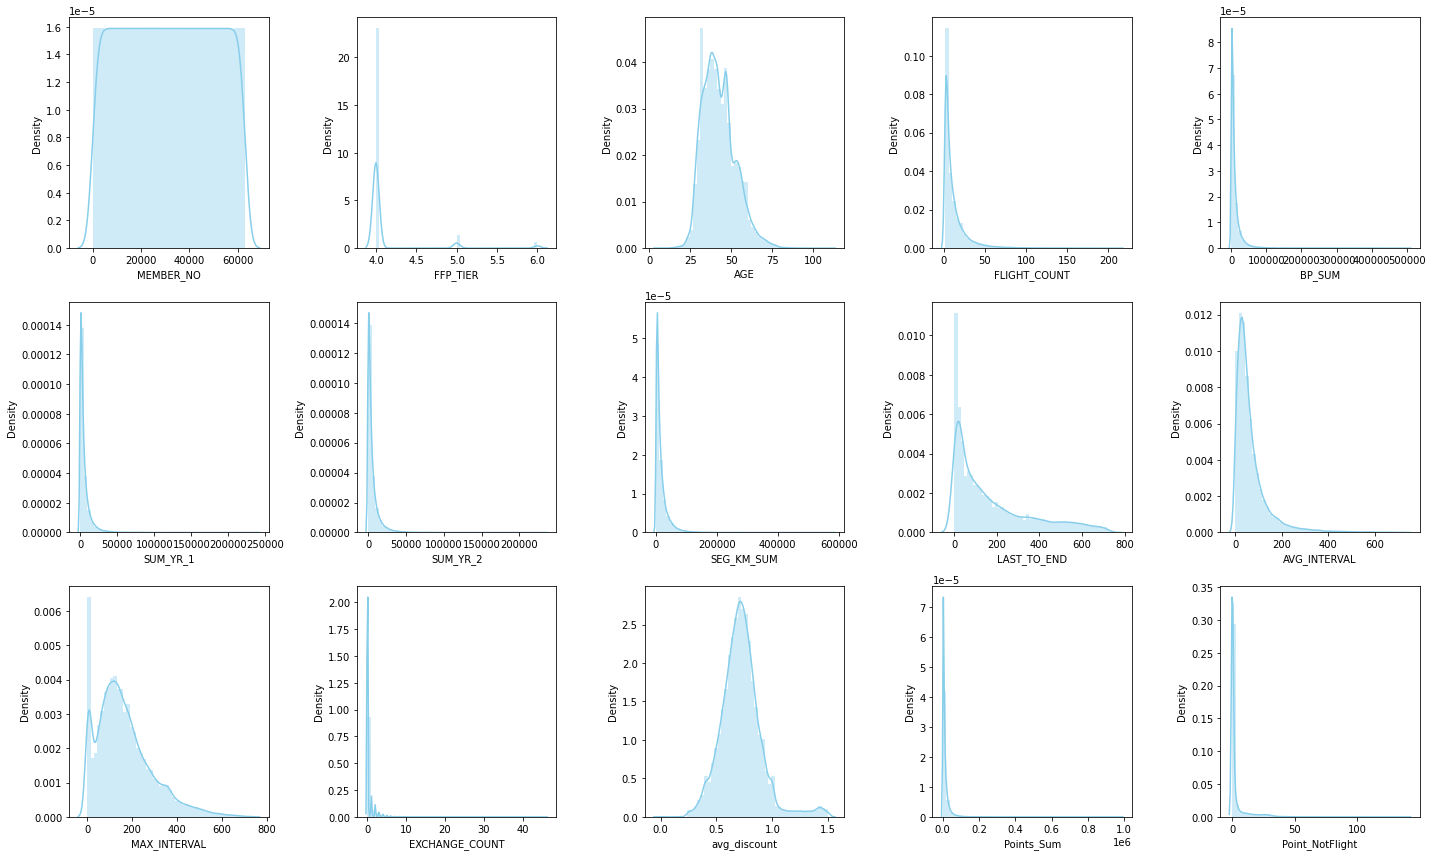

In [10]:
plt.figure(figsize=(20,12))

for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

From the boxplot and KDE plots above, we can observe:
* `FFP_TIER` is actually categorical value, because it has discrete values (4, 5 or 6)
* `EXCHANGE_COUNT`, `Points_Sum` and `Point_NotFlight` has many unique values, there is no need to handle the outliers later
* `MEMBER_NO` has unique values so no need to check its symmetricity
* Most of the features are positively skewed and have some extreme features

### Multivariate

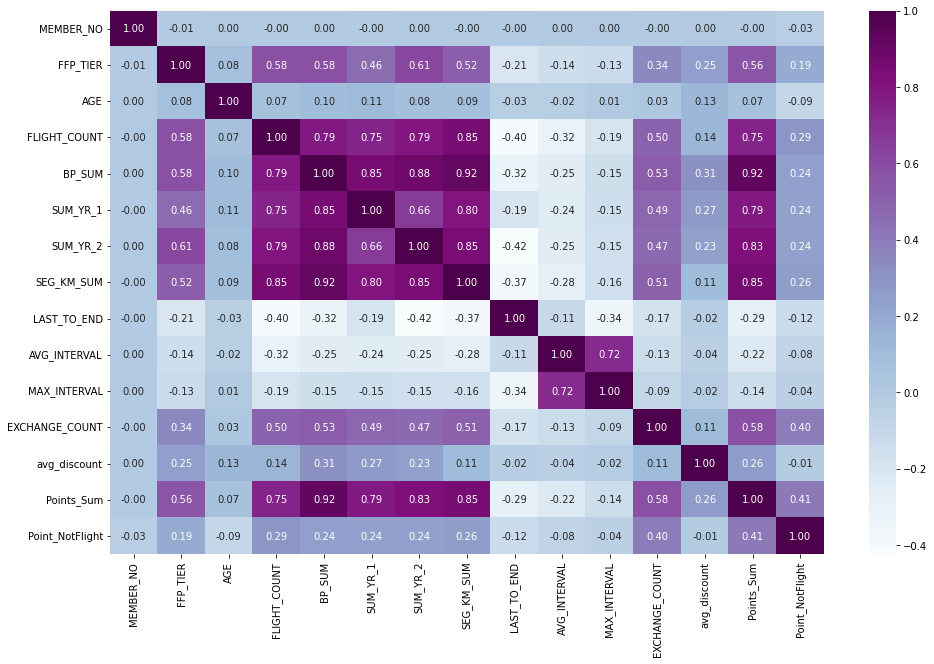

In [11]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

From the correlation heatmap above, we observe:
* `SEG_KM_SUM`, `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, and `SUM_YR_2` are correlated to each other.
* `Points_Sum` are correlated with `FLIGHT_COUNT`, `SUM_YR_2`, and `SEG_KM_SUM`.

# Data Preprocessing

In [12]:
dff = df.copy() 

## Data Cleaning

In [13]:
dff.duplicated().sum()

0

In [14]:
percent_missing = dff.isnull().sum() * 100 / len(dff)
missing_value = pd.DataFrame({'percent_missing': percent_missing})
missing_value

,percent_missing
MEMBER_NO,0.000000
FFP_DATE,0.000000
FIRST_FLIGHT_DATE,0.000000
GENDER,0.004763
FFP_TIER,0.000000
WORK_CITY,3.602273
WORK_PROVINCE,5.156538
WORK_COUNTRY,0.041278
AGE,0.666794
LOAD_TIME,0.000000


* `MEMBER_NO` will be dropped since it consists of unique values
* Missing values in `AGE`, `SUM_YR_1` and `SUM_YR_2` will be replaced with median
* `WORK_CITY`, `WORK_PROVINCE`, and `WORK_COUNTRY` will also be dropped because they have many categorical values and we don't really need them.
* The `GENDER` column will also be dropped

In [15]:
#replace missing value with median
dff['AGE'] = dff['AGE'].fillna(dff['AGE'].median())
dff['SUM_YR_1'] = dff['SUM_YR_1'].fillna(dff['SUM_YR_1'].median())
dff['SUM_YR_2'] = dff['SUM_YR_2'].fillna(dff['SUM_YR_2'].median())

In [16]:
#delete work_city, work_province, work_country, gender columns
dff = dff.drop(['MEMBER_NO','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

In [17]:
#Check the missing values again
dff.isnull().values.any()

False

## Feature Engineering

Based on our exploration above, we understand that we have to change several columns into date format.

In [18]:
dff['FFP_DATE']= pd.to_datetime(dff['FFP_DATE'])
dff['FIRST_FLIGHT_DATE']= pd.to_datetime(dff['FIRST_FLIGHT_DATE'])
dff['LOAD_TIME']= pd.to_datetime(dff['LOAD_TIME'])

However when we try to change `LAST_FLIGHT_DATE` into datetime, an error occured. The error is because on a date there is a '2014/2/29' value. As we know that 2014 is not a leap year, so I will change it to '2014/2/28'

In [19]:
#change 2014/2/29 to 2019/2/28 because 2014 is not a leap year
dff['LAST_FLIGHT_DATE'] = dff['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')
dff['LAST_FLIGHT_DATE']= pd.to_datetime(dff['LAST_FLIGHT_DATE'])

In [20]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62988 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 2   FFP_TIER           62988 non-null  int64         
 3   AGE                62988 non-null  float64       
 4   LOAD_TIME          62988 non-null  datetime64[ns]
 5   FLIGHT_COUNT       62988 non-null  int64         
 6   BP_SUM             62988 non-null  int64         
 7   SUM_YR_1           62988 non-null  float64       
 8   SUM_YR_2           62988 non-null  float64       
 9   SEG_KM_SUM         62988 non-null  int64         
 10  LAST_FLIGHT_DATE   62988 non-null  datetime64[ns]
 11  LAST_TO_END        62988 non-null  int64         
 12  AVG_INTERVAL       62988 non-null  float64       
 13  MAX_INTERVAL       62988 non-null  int64         
 14  EXCHAN

## Outliers Handling

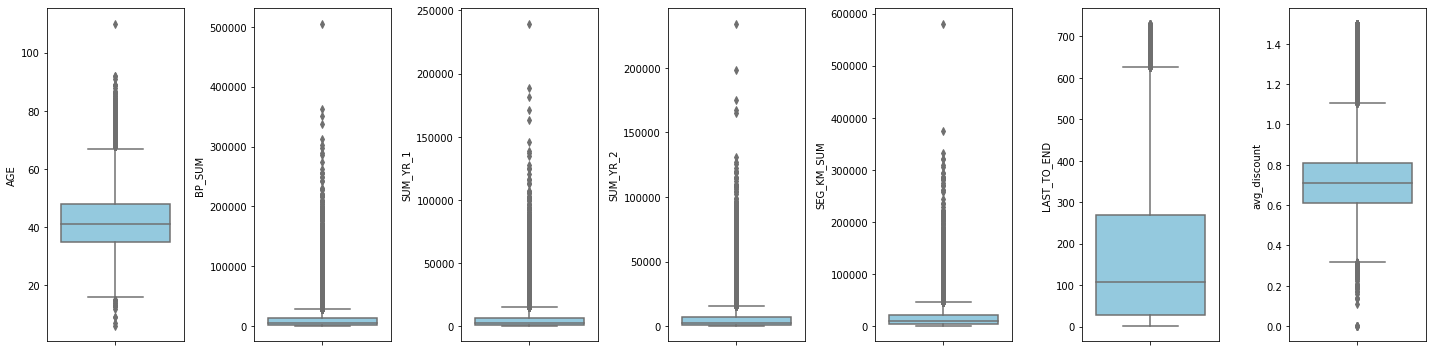

In [21]:
plt.figure(figsize=(20,5))
features = ['AGE', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'avg_discount']
for i in range(0, len(features)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

* Some outliers represent natural variations in the population, and they should be left as is. 
* I will only remove the extreme value `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, and `SEG_KM_SUM`.
* From our exploration above, we understand that `AGE` has problematic value (age less than 17).

In [22]:
#filter so the dataset has no extreme value
dff = dff[dff['BP_SUM'] <= 40_000]
dff = dff[dff['SUM_YR_1'] <= 25_000]
dff = dff[dff['SUM_YR_2'] <= 25_000]
dff = dff[dff['SEG_KM_SUM'] <= 50_000]

In [23]:
#filter customer with strange age
dff = dff[dff['AGE'] >= 17]

In [24]:
dff.shape

(58148, 18)

Now we have 58148 rows in our dataset!

## Feature Selection

One of the most popular, easy-to-use, and effective segmentation methods to enable marketers to analyze customer behavior is RFM analysis. Based on [this paper](https://books.google.co.id/books?id=CcH4DwAAQBAJ&pg=PA95&lpg=PA95&dq=chinese+member+airline+data+customer+bp_sum&source=bl&ots=MuNwvzNnN-&sig=ACfU3U0hPyubVpBG7RGuxmQgm9Zn7m2g6g&hl=en&sa=X&ved=2ahUKEwjZsKzHy7LsAhWZaCsKHW9XDW8Q6AEwCHoECAoQAg#v=onepage&q=chinese%20member%20airline%20data%20customer%20bp_sum&f=false), they suggest to use LRFMC model which has additional Length and Discount Coefficient parameter when doing customer segmentation in aviation data. So we get LRFMC model instead.

* **Length**: the length of days between subscriber's first register day to observation time. A larger number means they have been a member for a longer time (the bigger the better)
* **Recency**: the length of a passenger's last consumption to observation window. A smaller number means they flew more recently (the smaller the better)
* **Frequency** the passenger's consumption frequency within a certain period of time. A bigger number means they flew more frequently (the bigger the better)
* **Monetary** the average amount spent over a certain period of time. A bigger number means they spent more money (the bigger the better)
* **Discount Coefficient**: the average space discount factor for passengers traveling within a certain period of time A bigger number means they use discounts more (the smaller the better)

Therefore, I will try to select feature that will be used in my analysis. The columns that are related to the parameters are as follow:
* **L**ength: `LOAD_TIME` - `FFP_DATE`
* **R**ecency: `LAST_TO_END`
* **F**requency: `FLIGHT_COUNT`
* **M**onetary: `SEG_KM_FM`
* **C**ustomer Cost: `avg_discount`

In [25]:
data = dff[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
data.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
2744,2014-03-31,2008-08-14,256,26,32160,1.420642
2776,2014-03-31,2005-12-03,115,26,35705,1.271262
2897,2014-03-31,2008-03-02,7,48,47686,0.935792
3004,2014-03-31,2007-02-01,17,24,31651,1.382806
3026,2014-03-31,2012-01-06,18,37,48135,0.907022


## Data Transformation

In [26]:
data['L'] = data['LOAD_TIME'] - data['FFP_DATE']
data['L'] = (data['L'].astype(str).str.split().str[0]).astype(int)

In [27]:
data = data[['L', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
data.columns = ['L','R','F','M','C']
data.head()

,L,R,F,M,C
2744,2055,256,26,32160,1.420642
2776,3040,115,26,35705,1.271262
2897,2220,7,48,47686,0.935792
3004,2615,17,24,31651,1.382806
3026,815,18,37,48135,0.907022


Because each column has a different range, we have to do standardization.

## Data Standardization

In [28]:
sc = StandardScaler()
data_std = sc.fit_transform(data.astype(float))

In [29]:
data_std = pd.DataFrame(data=data_std, columns=data.columns)
data_std.head()

,L,R,F,M,C
0,0.718502,0.369599,2.031741,1.827579,3.937852
1,1.896613,-0.389607,2.031741,2.159054,3.106486
2,0.915851,-0.971127,4.681371,3.279334,1.239452
3,1.388291,-0.917282,1.790866,1.779986,3.727274
4,-0.764601,-0.911898,3.356556,3.321318,1.079333


# K-Means Clustering

Before we do the modeling, we have to determine the number of clusters. For determining the optimal number of clusters, I check the inertia.

### Elbow Plot

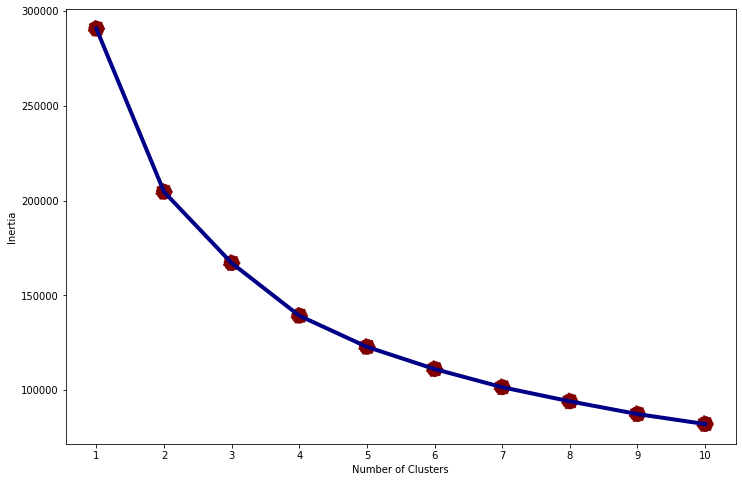

In [30]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

From elbow plot, there is a possibility that the optimum clusters are 4-6. Because we need to consider the business value when doing the clustering, I will check the condition when the data is divided into 4, 5 and 6 clusters respectively.

#### 4 Clusters

In [31]:
data_std_4 = data_std.copy()
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(data_std_4)

KMeans(n_clusters=4, random_state=0)

In [32]:
data_std_4['clusters'] = kmeans_4.labels_
data_std_4.head()

,L,R,F,M,C,clusters
0,0.718502,0.369599,2.031741,1.827579,3.937852,2
1,1.896613,-0.389607,2.031741,2.159054,3.106486,2
2,0.915851,-0.971127,4.681371,3.279334,1.239452,2
3,1.388291,-0.917282,1.790866,1.779986,3.727274,2
4,-0.764601,-0.911898,3.356556,3.321318,1.079333,2


In [33]:
radar_plot_4 = data_std_4.groupby('clusters').agg('median').reset_index()
radar_plot_4

,clusters,L,R,F,M,C
0,0,-0.551704,1.608021,-0.738326,-0.793920,0.058244
1,1,-0.769385,-0.481142,-0.377013,-0.386379,-0.155777
2,2,0.104928,-0.852669,1.549990,1.612799,0.035011
3,3,1.139513,-0.427298,-0.377013,-0.351455,0.038477


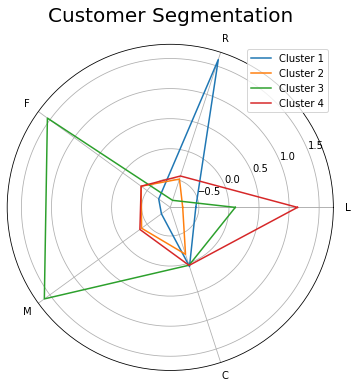

In [34]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
clusters = []

for i in range(0,4):
    num = []
    for cat in category:
        num.append(radar_plot_4[cat][i])
    num.append(radar_plot_4['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

for i in range(0,4):
    plt.plot(label_loc, clusters[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

* In this cluster division, we can't find any clusters with high value of C. We should check if we should add the number of clusters.

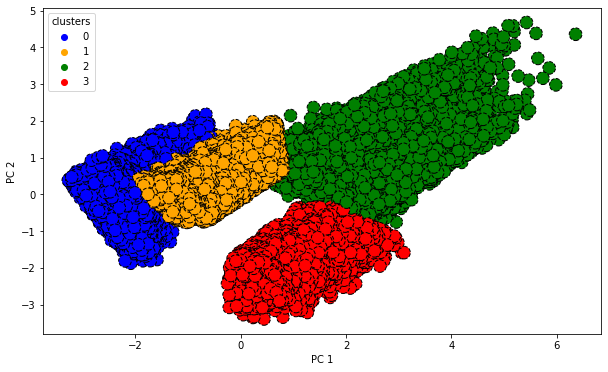

In [35]:
pca = PCA(n_components=2)

pca.fit(data_std_4)
pcs = pca.transform(data_std_4)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std_4['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red'],
    s=160,
    ax=ax
)

#### 5 Clusters

In [36]:
data_std_5 = data_std.copy()
kmeans_5 = KMeans(n_clusters=5, random_state=0)
kmeans_5.fit(data_std_5)

KMeans(n_clusters=5, random_state=0)

In [37]:
data_std_5['clusters'] = kmeans_5.labels_
data_std_5.head()

,L,R,F,M,C,clusters
0,0.718502,0.369599,2.031741,1.827579,3.937852,2
1,1.896613,-0.389607,2.031741,2.159054,3.106486,2
2,0.915851,-0.971127,4.681371,3.279334,1.239452,2
3,1.388291,-0.917282,1.790866,1.779986,3.727274,2
4,-0.764601,-0.911898,3.356556,3.321318,1.079333,2


In [38]:
radar_plot_5 = data_std_5.groupby('clusters').agg('median').reset_index()
radar_plot_5

,clusters,L,R,F,M,C
0,0,-0.550508,1.683403,-0.738326,-0.791115,-0.076724
1,1,-0.778954,-0.502680,-0.377013,-0.341170,-0.278598
2,2,0.104928,-0.852669,1.549990,1.653614,0.035938
3,3,1.192139,-0.454220,-0.377013,-0.312557,-0.113986
4,4,-0.329239,-0.093463,-0.497451,-0.644686,1.325443


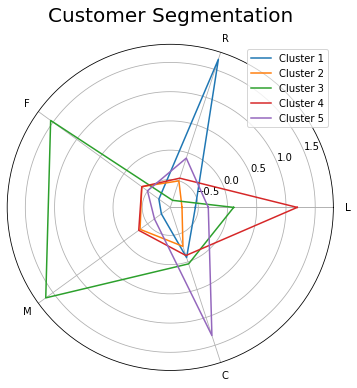

In [39]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
clusters = []

for i in range(0,5):
    num = []
    for cat in category:
        num.append(radar_plot_5[cat][i])
    num.append(radar_plot_5['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)
for i in range(0,5):
    plt.plot(label_loc, clusters[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

* We finally get the cluster with high value of C. The clusters also divided beautifully. It is interesting to explore more.

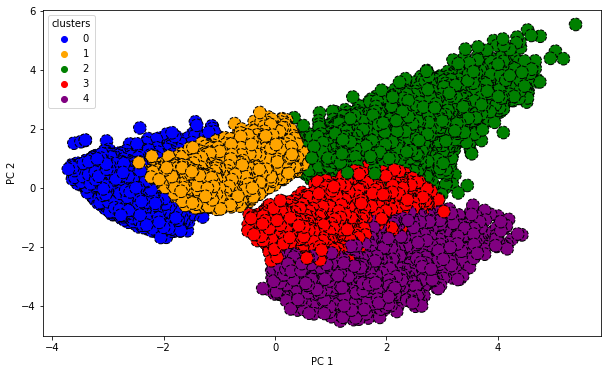

In [40]:
pca = PCA(n_components=2)

pca.fit(data_std_5)
pcs = pca.transform(data_std_5)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std_5['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple'],
    s=160,
    ax=ax
)

#### 6 Clusters

In [41]:
data_std_6 = data_std.copy()
kmeans_6 = KMeans(n_clusters=6, random_state=0)
kmeans_6.fit(data_std_6)

KMeans(n_clusters=6, random_state=0)

In [42]:
data_std_6['clusters'] = kmeans_6.labels_
data_std_6.head()

,L,R,F,M,C,clusters
0,0.718502,0.369599,2.031741,1.827579,3.937852,4
1,1.896613,-0.389607,2.031741,2.159054,3.106486,4
2,0.915851,-0.971127,4.681371,3.279334,1.239452,4
3,1.388291,-0.917282,1.790866,1.779986,3.727274,4
4,-0.764601,-0.911898,3.356556,3.321318,1.079333,4


In [43]:
radar_plot_6 = data_std_6.groupby('clusters').agg('median').reset_index()
radar_plot_6

,clusters,L,R,F,M,C
0,0,-0.515823,1.758785,-0.738326,-0.791115,-0.039077
1,1,1.231609,-0.443451,-0.377013,-0.324620,-0.107551
2,2,-0.802875,-0.368069,-0.497451,-0.561000,-0.437997
3,3,-0.567253,-0.755749,0.586489,0.743392,-0.012429
4,4,0.734051,-0.879591,2.031741,2.080697,0.058194
5,5,-0.347179,-0.104232,-0.497451,-0.645154,1.300147


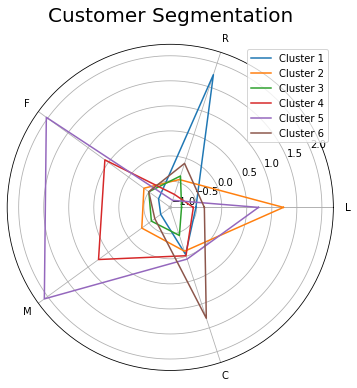

In [44]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
clusters = []

for i in range(0,6):
    num = []
    for cat in category:
        num.append(radar_plot_6[cat][i])
    num.append(radar_plot_6['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

for i in range(0,6):
    plt.plot(label_loc, clusters[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

* There is an overlapping of cluster 4 and cluster 5 (the only difference is the range, but there is no need to make them separate categories)

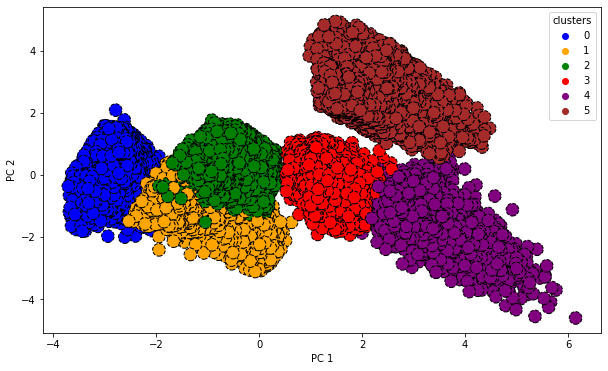

In [45]:
pca = PCA(n_components=2)

pca.fit(data_std_6)
pcs = pca.transform(data_std_6)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std_6['clusters']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple', 'brown'],
    s=160,
    ax=ax
)

If we compare the number of customers of each cluster, it can be seen that k = 5 has a fairly even distribution. 
At k=6, we can observe the mixture of green and yellow clusters so it is not good.


**Conclusion: Based on the exploration above, we divide this dataset into 5 clusters.**

### Modeling

In [46]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data_std)

KMeans(n_clusters=5, random_state=0)

In [47]:
data_std['clusters'] = kmeans.labels_
data_std.head()

,L,R,F,M,C,clusters
0,0.718502,0.369599,2.031741,1.827579,3.937852,2
1,1.896613,-0.389607,2.031741,2.159054,3.106486,2
2,0.915851,-0.971127,4.681371,3.279334,1.239452,2
3,1.388291,-0.917282,1.790866,1.779986,3.727274,2
4,-0.764601,-0.911898,3.356556,3.321318,1.079333,2


In [48]:
radar_plot = data_std.groupby('clusters').agg('median').reset_index()
radar_plot

,clusters,L,R,F,M,C
0,0,-0.550508,1.683403,-0.738326,-0.791115,-0.076724
1,1,-0.778954,-0.502680,-0.377013,-0.341170,-0.278598
2,2,0.104928,-0.852669,1.549990,1.653614,0.035938
3,3,1.192139,-0.454220,-0.377013,-0.312557,-0.113986
4,4,-0.329239,-0.093463,-0.497451,-0.644686,1.325443


### Evaluation

#### Inertia

In [49]:
print(f'Inertia (n=5): {kmeans.inertia_}')

Inertia (n=5): 122886.90530599328


# Insights

This dataset has 5 features, so for visualization, I use PCA.

In [50]:
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,2.616893,0.129245,2
1,3.233862,0.440845,2
2,4.306766,3.324582,2
3,3.186949,0.119018,2
4,3.226638,3.153212,2


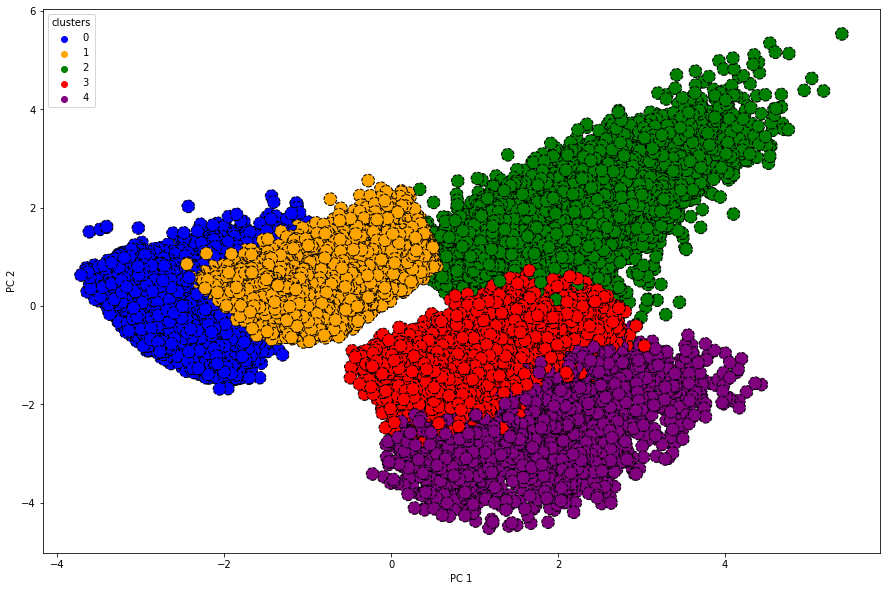

In [51]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red', 'purple'],
    s=160,
    ax=ax
)

In [52]:
summary = data_std.groupby('clusters').agg('median').reset_index()
display(summary)

,clusters,L,R,F,M,C
0,0,-0.550508,1.683403,-0.738326,-0.791115,-0.076724
1,1,-0.778954,-0.502680,-0.377013,-0.341170,-0.278598
2,2,0.104928,-0.852669,1.549990,1.653614,0.035938
3,3,1.192139,-0.454220,-0.377013,-0.312557,-0.113986
4,4,-0.329239,-0.093463,-0.497451,-0.644686,1.325443


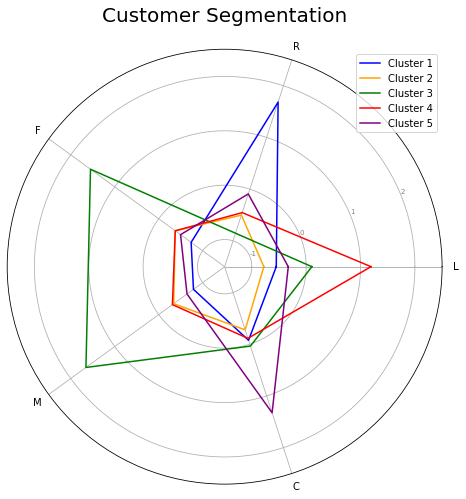

In [53]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
color = ['blue', 'orange', 'green', 'red', 'purple']
clusters = []

for i in range(0,5):
    num = []
    for cat in category:
        num.append(radar_plot[cat][i])
    num.append(radar_plot['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
for i in range(0,5):
    plt.plot(label_loc, clusters[i], color=color[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.legend()
plt.show()

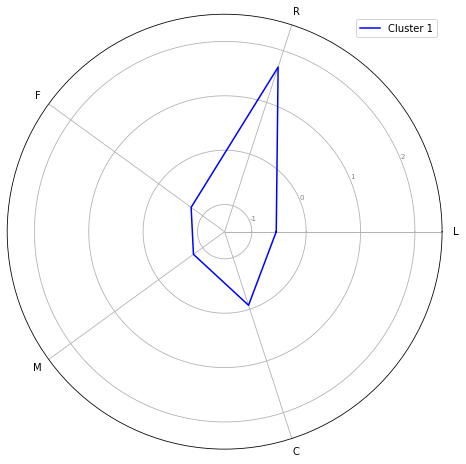

In [54]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[0], color=color[0], label = 'Cluster 1')
plt.legend()
plt.show()

* Cluster 1 has the largest recency value which means it has been a long time since they used our service (their last use is 2 years ago!)
* The number of flights, total mileage and membership time are average. 

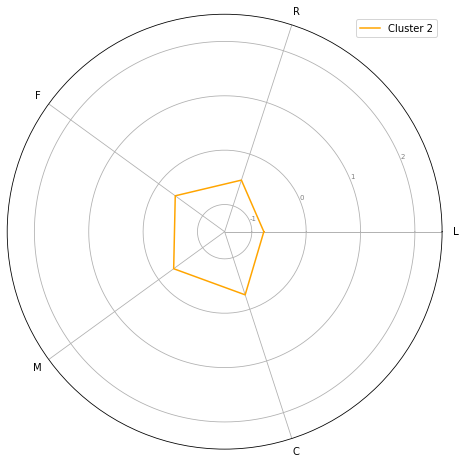

In [55]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[1], color=color[1], label = 'Cluster 2')
plt.legend()
plt.show()

* Cluster 2 has average scores in all aspects. 
* They can be considered as new customers (about 3 years) with average mileage and frequency. They also use the discount sufficiently.
* However, what makes them interesting is that their frequency and total mileage is the second highest (tied with cluster 4)

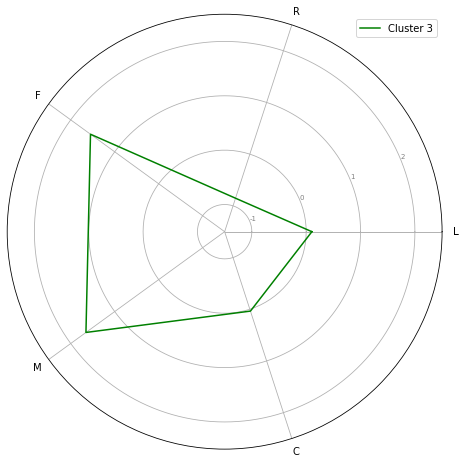

In [56]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[2], color=color[2], label = 'Cluster 3')
plt.legend()
plt.show()

* Cluster 3 has an average L value which is a sign that they are not a new customer. 
* They have a high frequency of flights, in line with their total mileage. 
* They also recently used our services (recency value is the smallest). 

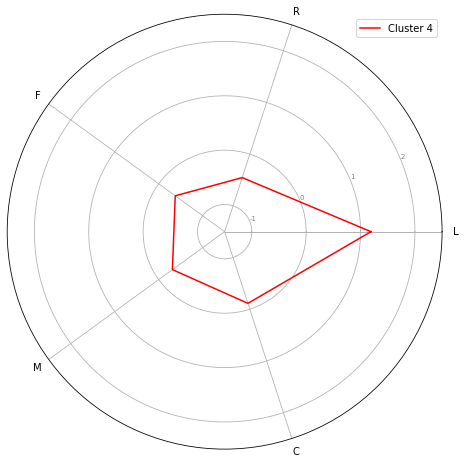

In [57]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[3], color=color[3], label = 'Cluster 4')
plt.legend()
plt.show()

* Cluster 4 has the highest L value, indicating that they have been customers for a long time (they have been with us for almost 7 years)
* However their frequency, total mileage and recency are average.

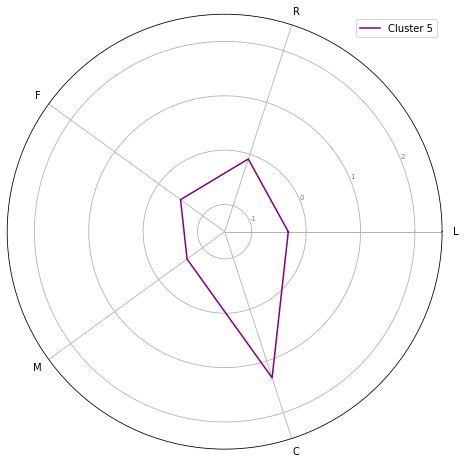

In [58]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[4], color=color[4], label = 'Cluster 5')
plt.legend()
plt.show()

* Cluster 5 has the highest C value, indicating that they use discounts very often.
* What makes it interesting that the number of their flights and total mileage is not so many. This is clearly the number of customers who always take advantage of the discount! This kind of customer is actually low value.

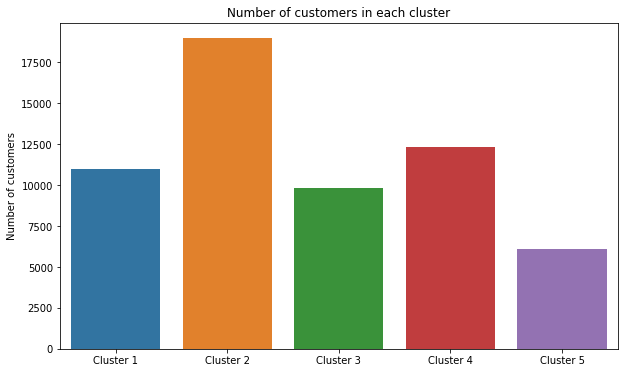

In [59]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=data_std["clusters"])
#ax.bar_label(ax.containers[0])  #to display count 
plt.xticks([0,1,2,3,4], ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"])
plt.title("Number of customers in each cluster")
plt.xlabel("")
plt.ylabel("Number of customers")
plt.show()

Based on LRMFC Model, we get 5 clusters of our customers, which are:
1. Cluster 1 aka **The Hibernating Customers** (10964 customers)
2. Cluster 2 aka **The Promising Customer** (18974 customers)
3. Cluster 3 aka **The Loyal Customers** (9810 customers)
4. Cluster 4 aka **The Old-Seasonal Customers** (12330 customers)
5. Cluster 5 aka **The Cheap Customer** (6070 customers)

## Business Recommendation

**1. Make Our Loyal Customers feel Loved** <br>
Cluster 3 is our loyal customer, because if we look at the customers in this cluster, they do not yet have a large average discount value. We can offer loyalty membership, and we can make more detailed clustering within them by using classification based on their accumulated airline miles. The point is we have to make them feel loved by our extra service and promotion.

**2. Test Our Promising Customers with Hero Treatment a.k.a Discount**<br>
In order to increase the engagement of our loyal customers in cluster 2 which contains only 9810 people, we need to do some action, such as making them fly more. As I mentioned before, cluster 2 can be seen as prospective member because they are new customer but have a total mileage and frequency value as many as customers in cluster 4. We can try giving them a discount voucher to grab these customers and engage them to fly more and become more loyal like cluster 3.

**3. Offer Off-Season or Surprise Discount for Our Old Customers**<br>
We know these old customers will use our service, however the frequency is average because they only fly seasonally. We should maintain these customers and make them fly more by offering them off-season discount in order to make them fly in a different time than they usually fly.

**4. Give more Attention to Hibernating Customers**<br>
Cluster 1 contains customers who haven't flown with us for a long time. If we don't do anything, they can be a lost customer. We can give them more attention by sending promotional emails or push notifications. The point is to show them our last-ditch big effort to reactivate.